In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [13]:
import pandas as pd
df = pd.read_csv('/content/prices.csv')
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [14]:
print("Dataset shape:" , df.shape)
print('\n')
print("column info: ",df.info())
print('\n')
print("missing values: ",df.isnull().sum())
print('\n')
df.describe()
df.tail()

Dataset shape: (17782, 7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17782 entries, 0 to 17781
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    17782 non-null  object 
 1   symbol  17781 non-null  object 
 2   open    17781 non-null  float64
 3   close   17781 non-null  float64
 4   low     17781 non-null  float64
 5   high    17781 non-null  float64
 6   volume  17781 non-null  float64
dtypes: float64(5), object(2)
memory usage: 972.6+ KB
column info:  None


missing values:  date      0
symbol    1
open      1
close     1
low       1
high      1
volume    1
dtype: int64




,date,symbol,open,close,low,high,volume
17777,2010-02-26,HP,41.660000,40.520000,40.400002,41.700001,28021300.0
17778,2010-02-26,HPQ,50.919996,50.789998,50.610000,50.989997,24262000.0
17779,2010-02-26,HRB,17.260000,17.280001,16.700001,17.490000,4387000.0
17780,2010-02-26,HRL,41.330002,41.110001,40.950001,41.439999,2124400.0
17781,2010-02-26,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

<ipython-input-18-0f856a6470c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock['date'] = pd.to_datetime(df_stock['date'])


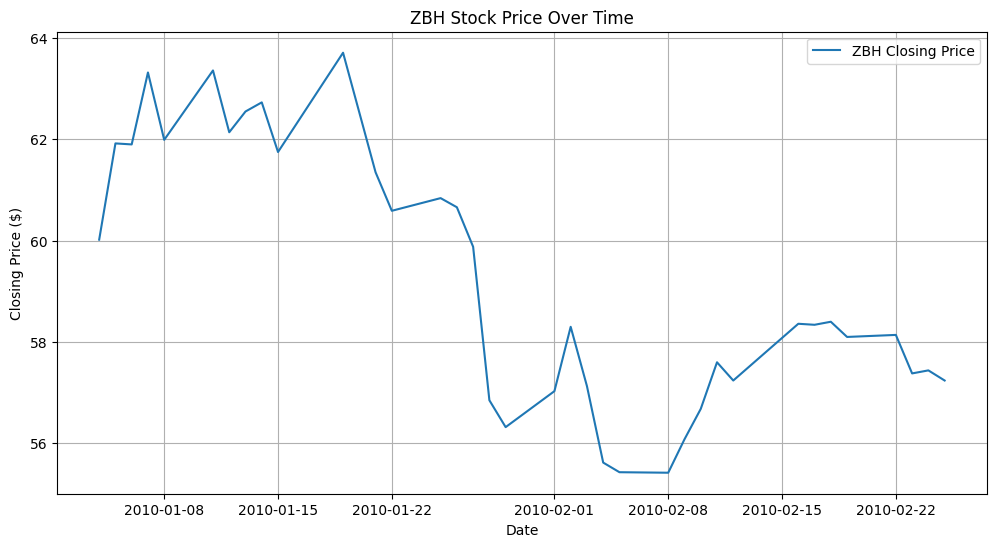

In [18]:
import matplotlib.pyplot as plt
stock_symbol = 'ZBH'
df_stock = df[df['symbol'] == stock_symbol]
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock = df_stock.sort_values(by='date')

plt.figure(figsize=(12,6))
plt.plot(df_stock['date'], df_stock['close'], label=f"{stock_symbol} Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.title(f"{stock_symbol} Stock Price Over Time")
plt.legend()
plt.grid()
plt.show()


In [22]:
# Select features (input) and target (output)
features = ['open', 'high', 'low', 'volume']  # Input variables
target = ['close']  # What we want to predict

# Create feature matrix (X) and target variable (y)
X = df_stock[features]
y = df_stock[target]

# Show sample
X.head()

,close
715,60.020000
1183,61.919998
1651,61.900002
2119,63.320000
2587,61.990002


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled , columns = features)
x_scaled.head()

,open,high,low,volume
0,-0.007817,0.069349,0.262521,-1.125988
1,0.767345,0.755587,0.801701,0.285412
2,1.052729,0.807801,1.131646,-0.379486
3,1.357393,1.397071,1.409282,0.233221
4,0.956316,1.076329,0.982767,0.936130


In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2,random_state=42)

print("train size : ", x_train.shape)
print("test size : ", x_test.shape)

train size :  (29, 4)
test size :  (8, 4)


In [39]:
import torch
import torch.nn as nn
import torch.optim as optim

x_train_tensor = torch.tensor(x_train.values , dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

class StockPredictor(nn.Module):
  def __init__(self):
    super(StockPredictor, self).__init__()
    self.fc1 = nn.Linear(4,64)
    self.fc2 = nn.Linear(64,32)
    self.fc3 = nn.Linear(32,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x


model = StockPredictor()
print(model)


StockPredictor(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)


In [29]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

In [41]:
eps = 100
for ep in range(eps):
  model.train()

  pred = model(x_train_tensor)
  loss = criterion(pred, y_train_tensor)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (ep +1)%10 == 0:
    print(f"Epoch {ep+1}/{eps}, loss: {loss.item():.4f}")

Epoch 10/100, loss: 3521.6724
Epoch 20/100, loss: 3521.6724
Epoch 30/100, loss: 3521.6724
Epoch 40/100, loss: 3521.6724
Epoch 50/100, loss: 3521.6724
Epoch 60/100, loss: 3521.6724
Epoch 70/100, loss: 3521.6724
Epoch 80/100, loss: 3521.6724
Epoch 90/100, loss: 3521.6724
Epoch 100/100, loss: 3521.6724


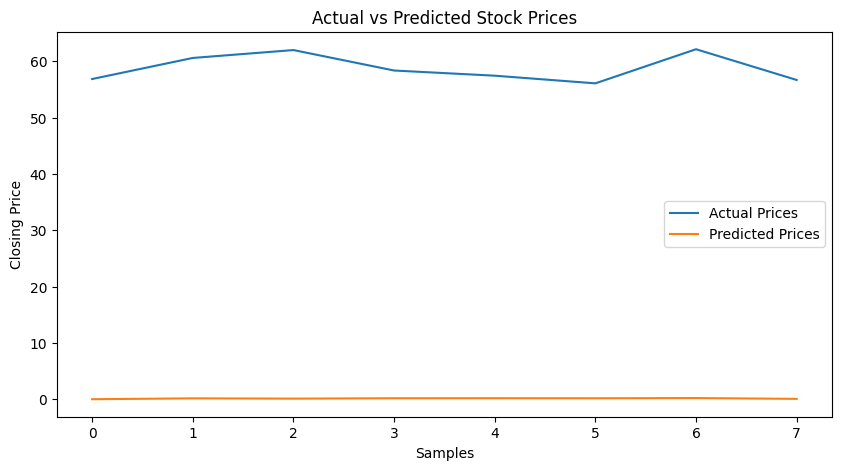

In [42]:
model.eval()

with torch.no_grad():
  y_pred = model(x_test_tensor)

y_pred = y_pred.numpy()
y_test = y_test_tensor.numpy()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test, label="Actual Prices")
plt.plot(y_pred, label="Predicted Prices")
plt.xlabel("Samples")
plt.ylabel("Closing Price")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Absolute Error (MAE): 58.6374
Mean Squared Error (MSE): 3443.5181
Root Mean Squared Error (RMSE): 58.6815
